# Cognitive model for Facebook behaviour

Test of the function run_message_sequence at model.py

Authors: Eric Araujo and Dave Ebbelaar


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import json
import numpy as np
import pandas as pd
from pprint import pprint

import lib.messages.generate_messages as gm
import lib.model.model as model

# Reload libraries automatically
%load_ext autoreload
%autoreload 2

# Plot in the notebook
%matplotlib inline

In [ ]:
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
from pprint import pprint

import model

In [2]:
# Get messages
messages = gm.sequence_messages(root_folder="../")
message = dict(messages.iloc[0])
last_message = dict(messages.iloc[-1])

In [3]:
# Get graph
g, w = model.generate_graph(root_folder="../")

Graph generated successfully. It contains 62 nodes and 77 edges.


In [4]:
# Get agents traits
agent='1'
agents = model.get_agents(root_folder="../") 
# Agents
try:
    agent_traits = agents[agent]
except:
    print("Problems retrieving the traits of agent {} in the JSON.".format(agent))
    pprint(agents, indent=3)
    sys.exit(666)

In [5]:
agent_traits

{'nf_ko': 0.5,
 'nf_ent': 0.5,
 'nf_is': 0.5,
 'nf_si': 0.5,
 'nf_se': 0.5,
 'pt_cons': 0.1,
 'mood': 0.5}

In [6]:
g1, w, traits, parameters, psd = model.run_message(
                                                    message=message, 
                                                    traits=agent_traits, 
                                                    previous_status_dict=None, 
                                                    alogistic_parameters=None, 
                                                    speed_factor=0.5, 
                                                    delta_t=1, timesteps=20, 
                                                    weightList=None, 
                                                    root_folder="../"
                                                )

Graph generated successfully. It contains 62 nodes and 77 edges.


In [7]:
g1.nodes['mood']

{'pos': 'inner',
 'func': 'alogistic',
 'status': {0: 0.5,
  1.0: 0.49589666974415325,
  2.0: 0.49183190042535796,
  3.0: 0.4878070597883702,
  4.0: 0.4838210871293427,
  5.0: 0.47987182134794143,
  6.0: 0.4759573155015295,
  7.0: 0.47207640186620525,
  8.0: 0.46822855667605134,
  9.0: 0.4644134691044487,
  10.0: 0.460630708811497,
  11.0: 0.45687962844034097,
  12.0: 0.45315943298392014,
  13.0: 0.4494692986512172,
  14.0: 0.4458084660402525,
  15.0: 0.44217628606495474,
  16.0: 0.4385722275050497,
  17.0: 0.4349958630489746,
  18.0: 0.4314468475465111,
  19.0: 0.42792489645710596}}

In [8]:
traits

{'nf_ko': 0.5,
 'nf_ent': 0.5,
 'nf_is': 0.5,
 'nf_si': 0.5,
 'nf_se': 0.5,
 'pt_cons': 0.1,
 'mood': 0.42792489645710596}

In [9]:
last_message

{'cat_con': 0.0,
 'cat_edu': 0.0,
 'cat_ent': 1.0,
 'cat_new': 0.0,
 'cat_per': 0.0,
 'msg_com': 0.0,
 'msg_med': 1.0,
 'msg_qua': 0.5,
 'msg_que': 0.0,
 'msg_rel': 1.0,
 'msg_sal': 0.5,
 'msg_sen': 1.0}

In [10]:
g2, w, s, parameters, psd = model.run_message(message=last_message, 
                                              traits=traits, 
                                              previous_status_dict=psd,
                                              alogistic_parameters=parameters, 
                                              speed_factor=0.5, 
                                              delta_t = 1, timesteps = 30, 
                                              weightList=w,
                                              root_folder="../"
                                             )

Graph generated successfully. It contains 62 nodes and 77 edges.


In [11]:
g2.nodes['mood']

{'pos': 'inner',
 'func': 'alogistic',
 'status': {0: 0.42792489645710596,
  1.0: 0.42442976791497244,
  2.0: 0.4209612491569844,
  3.0: 0.41751914683808444,
  4.0: 0.41410328038209726,
  5.0: 0.41071558726683416,
  6.0: 0.4073637069065022,
  7.0: 0.4040585551524683,
  8.0: 0.40081059477452546,
  9.0: 0.3976262517635091,
  10.0: 0.39450624953786395,
  11.0: 0.391446397989036,
  12.0: 0.38843973310787344,
  13.0: 0.3854786344756181,
  14.0: 0.38255621234339526,
  15.0: 0.37966691272422076,
  16.0: 0.3768065863068369,
  17.0: 0.3739722902865259,
  18.0: 0.3711620087669767,
  19.0: 0.36837438866911065,
  20.0: 0.3656085277658269,
  21.0: 0.3628638194583542,
  22.0: 0.3601398456691317,
  23.0: 0.35743630596298664,
  24.0: 0.3547529720744923,
  25.0: 0.3520896594232484,
  26.0: 0.3494462096055351,
  27.0: 0.346822479797082,
  28.0: 0.3442183364203213,
  29.0: 0.3416336514007859}}

In [12]:
for m in messages:
    print(m)

cat_con
cat_edu
cat_ent
cat_new
cat_per
msg_com
msg_med
msg_qua
msg_que
msg_rel
msg_sal
msg_sen


In [13]:
for m in dict(messages.T).items():
    print(m[1])

cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name: 0, dtype: float64
cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name: 1, dtype: float64
cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name: 2, dtype: float64
cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name: 3, dtype: float64
cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name

In [14]:
print(list(messages.iloc[40]), "\n\n", messages.iloc[40])

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.5, 0.0, 1.0, 0.5, 1.0] 

 cat_con    0.0
cat_edu    0.0
cat_ent    1.0
cat_new    0.0
cat_per    0.0
msg_com    0.0
msg_med    1.0
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    0.5
msg_sen    1.0
Name: 40, dtype: float64


In [15]:
inputsDF, parameters = model.run_message_sequence(message_seq=messages, traits=traits, alogistic_parameters=None,
                          root_folder='../')

Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfu

Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfully. It contains 62 nodes and 77 edges.
Graph generated successfu

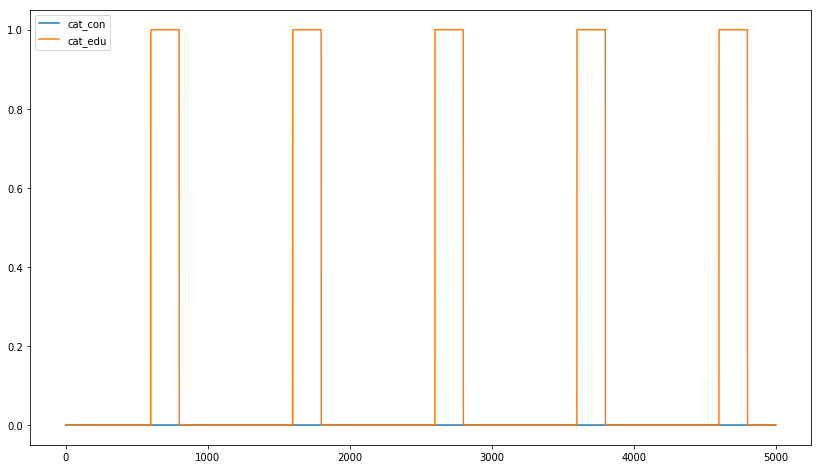

In [16]:
inputsDF[['cat_con', 'cat_edu']].plot(figsize=((14,8)))

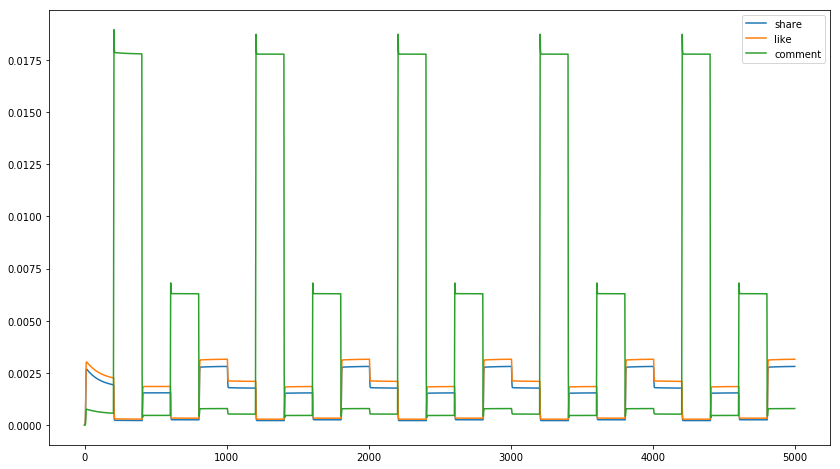

In [17]:
inputsDF[['share', 'like', 'comment']].plot(figsize=((14,8)))